# Example on how to run the ILTS code

In [1]:
import pandas as pd
import numpy as np
import ilt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Calculate the density of states for different temperatures

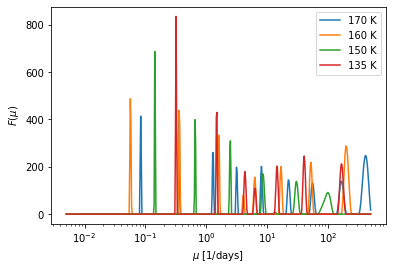

In [2]:
## Files with data containing the transients and measured times
filenames = ["data_170.csv","data_160.csv","data_150.csv","data_135.csv"]


for f in filenames:
    df = pd.read_csv(f, sep=",")

    
    t_exp = df["t"].to_numpy() #time
    F_exp = df["f"].to_numpy() #transient
    F_err = df["e"].to_numpy() #Data error

    ### Parameters for the ilt
    Nz, bound, alpha = 500, [5e-3,5e2], 5e-5


    z_exp, f_exp, F_fit = ilt.ilt(t_exp, F_exp, bound, Nz, alpha, F_error=F_err)
    
    plt.semilogx(z_exp,f_exp,label=f.split(".")[0].split("_")[1] + " K")
    
    

plt.xlabel(r"$\mu$ [1/days]")
plt.ylabel(r"$F(\mu)$")
plt.legend(loc="best")
plt.show()

### The original curve is obtained by doing a Laplace transform over the calculated density of states $F(\mu)$

In [3]:
df = pd.read_csv("data_170.csv", sep=",")

t_exp = df["t"].to_numpy()
F_exp = df["f"].to_numpy()
F_err = df["e"].to_numpy()

Nz, bound, alpha = 500, [5e-3,5e2], 5e-5


z_exp, f_exp, F_fit = ilt.ilt(t_exp, F_exp, bound, Nz, alpha, F_error=F_err)

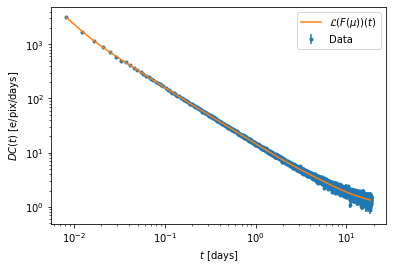

In [4]:
plt.errorbar(t_exp, F_exp, yerr=F_err, fmt=".",zorder=0, label="Data")

plt.plot(t_exp, F_fit, label=r"$\mathcal{L}( F(\mu) )(t)$")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$DC(t)$ [e/pix/days]")
plt.xlabel("$t$ [days]")

plt.legend(loc="best")
plt.show()

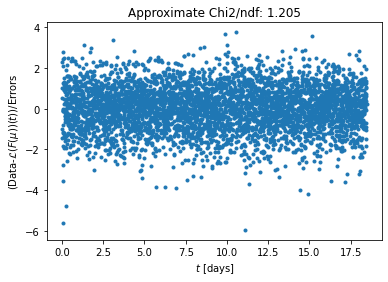

In [5]:
### A first approximation on the value of the chi2
chi2 = np.sum(np.power((F_exp-F_fit)/F_err,2))
chi2_ndf = chi2/len(F_exp)

plt.title("Approximate Chi2/ndf: {}".format(np.round(chi2_ndf,3)))
plt.plot(t_exp, (F_exp-F_fit)/F_err, ".")

plt.ylabel("(Data-$\mathcal{L}( F(\mu) )(t)$)/Errors")
plt.xlabel("$t$ [days]")
plt.show()